# Black Friday Sales Prediction.

Importing the libraries.

In [24]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from statsmodels.distributions.empirical_distribution import ECDF
lb = LabelEncoder()
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

Importing the data into the notebook.

In [4]:
df = pd.read_csv("train.csv")

Displaying the first 5 rows.

In [5]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


Removing nulls in the data.

In [6]:
df['Product_Category_2'] = df['Product_Category_2'].fillna('0')
df['Product_Category_3'] = df['Product_Category_3'].fillna('0')

Displaying the first 5 rows.

In [7]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0,0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6,14,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0,0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14,0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0,0,7969


Remember that for product category 2 and 3 the null value is not defined it could be anything.

In [8]:
df.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category_1             int64
Product_Category_2            object
Product_Category_3            object
Purchase                       int64
dtype: object

The different categories.

In [9]:
df["City_Category"].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

City B, has the highest number of people residing in it.

The number of items in the product category 1.

In [10]:
df["Product_Category_1"].value_counts()

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category_1, dtype: int64

Product 5 has the higest unit in store.

The number of items in the product category 2.

In [11]:
df["Product_Category_2"].value_counts()

0       173638
8.0      64088
14.0     55108
2.0      49217
16.0     43255
15.0     37855
5.0      26235
4.0      25677
6.0      16466
11.0     14134
17.0     13320
13.0     10531
9.0       5693
12.0      5528
10.0      3043
3.0       2884
18.0      2770
7.0        626
Name: Product_Category_2, dtype: int64

Product 0 has the highest units in store.

The number of item in the product category 3.

In [12]:
df["Product_Category_3"].value_counts()

0       383247
16.0     32636
15.0     28013
14.0     18428
17.0     16702
5.0      16658
8.0      12562
9.0      11579
12.0      9246
13.0      5459
6.0       4890
18.0      4629
4.0       1875
11.0      1805
10.0      1726
3.0        613
Name: Product_Category_3, dtype: int64

Product 0 has the highest units in store.

Encoding the categorical columns

In [13]:
df["Product_ID"] = lb.fit_transform(df["Product_ID"])
df["Gender"] = lb.fit_transform(df["Gender"])
df["Age"] = lb.fit_transform(df["Age"])
df["City_Category"] = lb.fit_transform(df["City_Category"])
df["Stay_In_Current_City_Years"] = lb.fit_transform(df["Stay_In_Current_City_Years"])

Displaying data with encoding.

In [14]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,672,0,0,10,0,2,0,3,0,0,8370
1,1000001,2376,0,0,10,0,2,0,1,6,14,15200
2,1000001,852,0,0,10,0,2,0,12,0,0,1422
3,1000001,828,0,0,10,0,2,0,12,14,0,1057
4,1000002,2734,1,6,16,2,4,0,8,0,0,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,3567,1,5,13,1,1,1,20,0,0,368
550064,1006035,3568,0,2,1,2,3,0,20,0,0,371
550065,1006036,3568,0,2,15,1,4,1,20,0,0,137
550066,1006038,3568,0,6,1,2,2,0,20,0,0,365


The purchase distribution.

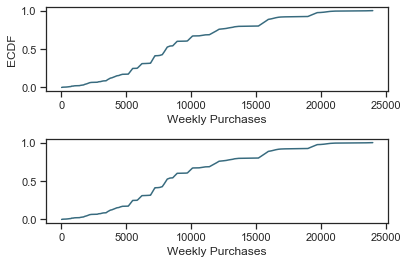

In [15]:
sns.set(style = "ticks")
c = '#386B7F' 
figure, axes = plt.subplots(nrows=2, ncols=2)
figure.tight_layout(pad=2.0)
plt.subplot(211)
cdf = ECDF(df['Purchase'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c);
plt.xlabel('Weekly Purchases'); plt.ylabel('ECDF');
plt.subplot(212)
cdf = ECDF(df['Purchase'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c);
plt.xlabel('Weekly Purchases');

Gender vs Product Category 1.

/Users/blessingmagabane/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


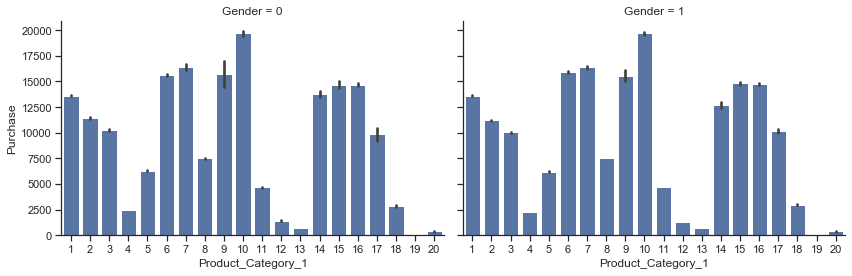

In [16]:
g = sns.FacetGrid(df, col="Gender", height=4, aspect=1.5)
g.map(sns.barplot, "Product_Category_1", "Purchase");

Product 10 is the most popular item for both genders in product category 1. For product category 1 both gender have similar purchase habits.

Gender vs Product Category 2.

/Users/blessingmagabane/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


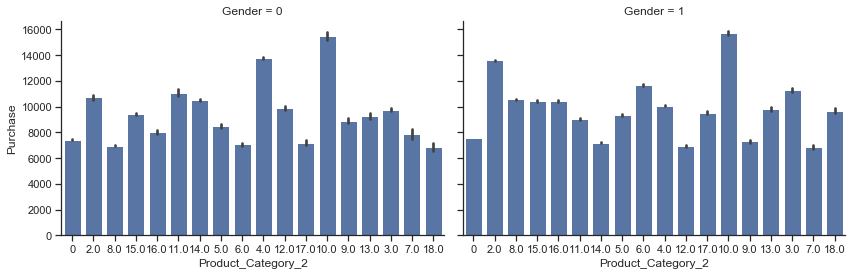

In [17]:
g = sns.FacetGrid(df, col="Gender", height=4, aspect=1.5)
g.map(sns.barplot, "Product_Category_2", "Purchase");

Product is also popular in product category 2. But the purchase behaviour differ in both male and female.

Gender vs Product Category 3.

/Users/blessingmagabane/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


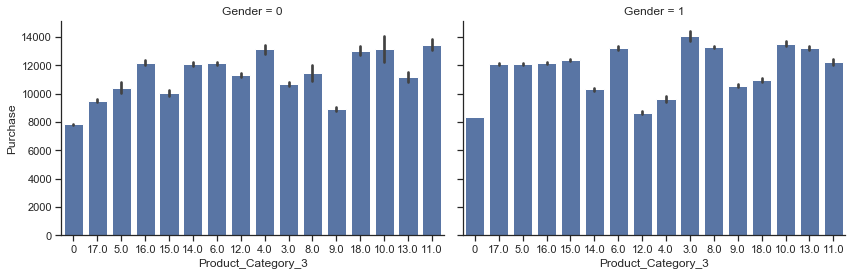

In [18]:
g = sns.FacetGrid(df, col="Gender", height=4, aspect=1.5)
g.map(sns.barplot, "Product_Category_3", "Purchase");

Product 3 is popular for males in product category 3, while 
product 11 is popular for females in the same product category. 

Purchase distributions per gender.

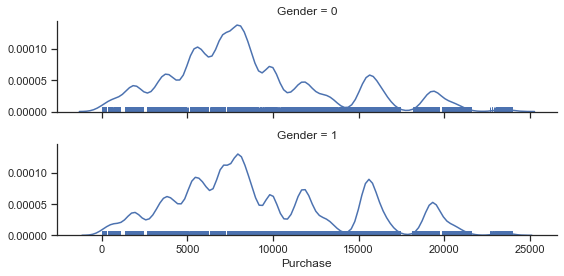

In [19]:
g = sns.FacetGrid(df, row="Gender",
                  height=2, aspect=4,)
g.map(sns.distplot, "Purchase", hist=False, rug=True);

For purchases that were between 0 and 14 000 females spent more than males. For purchases that are above 15 000 the males spent slightly more than females.

Gender purchase per city category.

/Users/blessingmagabane/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


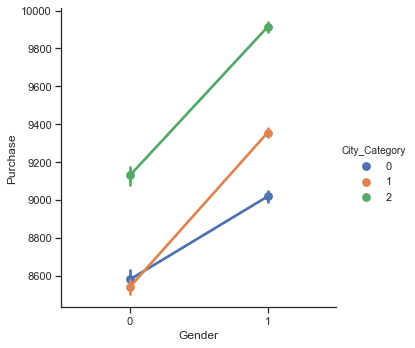

In [20]:
sns.factorplot(data= df, 
               x= 'Gender',
               y= 'Purchase',
               hue= 'City_Category');

Males tender to spent more than their female counter irrespective of the city. In city 1 and 3 the purchase gap 
is significantly huge. 

Gender purchase per stay in current city years.

/Users/blessingmagabane/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


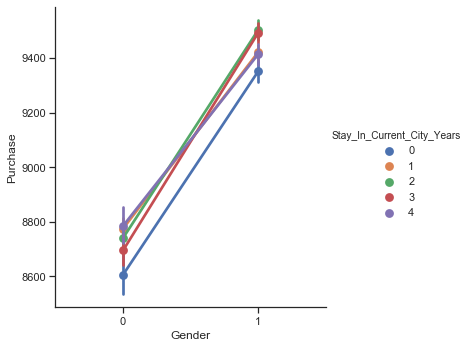

In [21]:
sns.factorplot(data= df, 
               x= 'Gender',
               y= 'Purchase',
               hue= 'Stay_In_Current_City_Years');

Again male tender to spend more than their female counterparts irrespective of their number of year stayed
in a current city.

Martial Status vs purchase per city category.

/Users/blessingmagabane/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


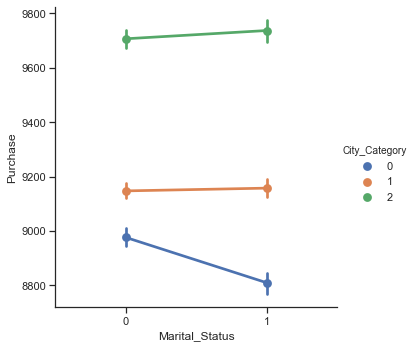

In [23]:
sns.factorplot(data= df, 
               x= 'Marital_Status',
               y= 'Purchase',
               hue= 'City_Category');

For city 0 single people tender to spent more than marriage couples. But for city 1 and 2 the purchase is uniform.

# Modeling.

We want to predict the amount a individual will spend on a black friday using the in their instrinsic attributes 
such as age, city category and martial status etc.

The purchase column we assign it to y, it is the label we are trying to predict.

In [26]:
y = df['Purchase']

Since the column purchase is assigned to y we dropit from the main data frame.

In [27]:
X = df.drop('Purchase', axis = 1)

Split the data into testing and training using the 30/70 rule.

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Defining the model which in this case is regression.

In [29]:
model = LinearRegression() 

Fitting the model to the data.

In [30]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Feature importance.

In [31]:
importance = model.coef_

Plotting the feature importance.

Feature: 0, Score: 0.01045
Feature: 1, Score: -0.32847
Feature: 2, Score: 493.13240
Feature: 3, Score: 110.77329
Feature: 4, Score: 6.05004
Feature: 5, Score: 320.83828
Feature: 6, Score: 8.33075
Feature: 7, Score: -45.99450
Feature: 8, Score: -346.26658
Feature: 9, Score: 8.36390
Feature: 10, Score: 137.08103


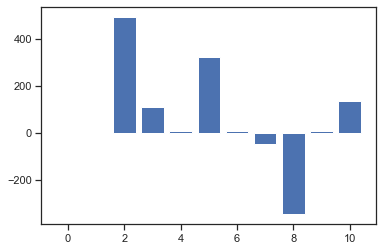

In [34]:
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

It is easy to see from the visualisation that feature product id does not play role or any effect on the prediction,
similarly with martial status and product category 1.

The gender,age,city and the rest of the features play an important role in predicting the purchase of an item. 

Before we predict the on the unseen data which is the test data we need to remove the least important columns.

In [39]:
X = df.drop('Product_ID', axis = 1)
X = df.drop('Product_Category_2', axis = 1)
X = df.drop('Marital_Status', axis = 1)

Split the data into testing and training using the 30/70 rule.

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [41]:
model = LinearRegression() 

Fitting the model with improved data.

In [42]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Importing the test data into notebook environment.

In [44]:
test = pd.read_csv('test.csv')

Encoding the test data.

In [45]:
test["Product_ID"] = lb.fit_transform(test["Product_ID"])
test["Gender"] = lb.fit_transform(test["Gender"])
test["Age"] = lb.fit_transform(test["Age"])
test["City_Category"] = lb.fit_transform(test["City_Category"])
test["Stay_In_Current_City_Years"] = lb.fit_transform(test["Stay_In_Current_City_Years"])

Removing any nulls from the test data.

In [46]:
test['Product_Category_2'] = test['Product_Category_2'].fillna('0')
test['Product_Category_3'] = test['Product_Category_3'].fillna('0')

In [47]:
test['Product_ID'] = df.drop('Product_ID', axis = 1)
test['Product_Category_2'] = df.drop('Product_Category_2', axis = 1)
test['Marital_Status'] = df.drop('Marital_Status', axis = 1)

Results of the model.

In [48]:
results = model.predict(test)

In [49]:
results

array([1.63391304e-06, 1.63391522e-06, 1.63390768e-06, ...,
       1.20000016e+01, 1.64374673e-06, 1.64374463e-06])